# Data Understanding and Exploration

## 1. Data Collection
The dataset used is `SriLanka_Supermarket_Sales.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../dataset/SriLanka_Supermarket_Sales.csv')

# Display the first few rows of the dataframe
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Product Code,Unit price,Quantity,Tax 5%,...,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Inventory Level,Promotion,Restock Interval (Days)
0,278-37-5752,Matara,Matara,Member,Male,Meat,P009,LKR 302.33,4,LKR 60.47,...,6/12/2025,6:26:21 AM,NaN,"LKR 1,209.32",4.761905,LKR 60.47,8.0,118,Yes,7
1,483-53-5622,Galle,Galle,Normal,Female,Beverages,P002,LKR 234.51,10,LKR 117.25,...,10/28/2024,5:58:43 AM,Mobile Pay,"LKR 2,345.10",4.761905,LKR 117.25,8.9,104,No,10
2,562-74-1493,Colombo,Colombo,Normal,Male,Frozen Foods,P006,LKR 201.06,8,LKR 80.42,...,7/20/2025,4:30:06 PM,Credit Card,"LKR 1,608.48",4.761905,LKR 80.42,9.0,159,No,10
3,904-20-6783,Kandy,Kandy,Member,Male,Household,P003,LKR 279.93,6,LKR 83.98,...,8/21/2024,4:10:05 PM,E-wallet,"LKR 1,679.58",4.761905,LKR 83.98,8.8,101,No,10
4,382-87-2928,Colombo,Colombo,Normal,Male,Household,P003,LKR 414.51,2,LKR 41.45,...,5/18/2025,1:51:09 AM,E-wallet,LKR 829.02,4.761905,LKR 41.45,9.2,179,No,7


In [2]:
# Clean currency columns
currency_cols = ['Unit price', 'Tax 5%', 'Sales', 'cogs', 'gross income']
for col in currency_cols:
    df[col] = df[col].replace({'LKR ': '', ',': ''}, regex=True).astype(float)

## 2. Data Exploration

### Get an initial overview of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               4184 non-null   object 
 1   Branch                   4184 non-null   object 
 2   City                     4184 non-null   object 
 3   Customer type            4184 non-null   object 
 4   Gender                   3969 non-null   object 
 5   Product line             4184 non-null   object 
 6   Product Code             4184 non-null   object 
 7   Unit price               4184 non-null   float64
 8   Quantity                 4184 non-null   int64  
 9   Tax 5%                   4184 non-null   float64
 10  Sales                    4184 non-null   float64
 11  Date                     4184 non-null   object 
 12  Time                     4184 non-null   object 
 13  Payment                  3996 non-null   object 
 14  cogs                    

In [4]:
# Display column names
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Product Code', 'Unit price', 'Quantity', 'Tax 5%',
       'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage',
       'gross income', 'Rating', 'Inventory Level', 'Promotion',
       'Restock Interval (Days)'],
      dtype='object')

### Calculate summary statistics

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,Inventory Level,Restock Interval (Days)
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4.184000e+03,4184.000000,3968.000000,4184.000000,4184.000000
mean,299.086475,5.534417,82.902904,1740.955306,1658.052402,4.761905e+00,82.902904,7.016179,110.747371,6.180449
std,115.439049,2.869671,56.041578,1176.871488,1120.829911,3.117879e-13,56.041578,1.715848,52.373103,2.578751
min,100.010000,1.000000,5.010000,105.220000,100.210000,4.761905e+00,5.010000,4.000000,20.000000,3.000000
25%,199.727500,3.000000,38.027500,798.550000,760.522500,4.761905e+00,38.027500,5.500000,65.000000,3.000000
50%,298.825000,6.000000,70.730000,1485.355000,1414.625000,4.761905e+00,70.730000,7.000000,111.500000,5.000000
75%,399.127500,8.000000,119.842500,2516.680000,2396.837500,4.761905e+00,119.842500,8.500000,157.000000,7.000000
max,499.880000,10.000000,249.930000,5248.430000,4998.500000,4.761905e+00,249.930000,10.000000,200.000000,10.000000


### Identify missing values

In [6]:
df.isnull().sum()

Invoice ID                   0
Branch                       0
City                         0
Customer type                0
Gender                     215
Product line                 0
Product Code                 0
Unit price                   0
Quantity                     0
Tax 5%                       0
Sales                        0
Date                         0
Time                         0
Payment                    188
cogs                         0
gross margin percentage      0
gross income                 0
Rating                     216
Inventory Level              0
Promotion                    0
Restock Interval (Days)      0
dtype: int64

### Identify duplicate rows

In [7]:
df.duplicated().sum()

0

### Visualize data

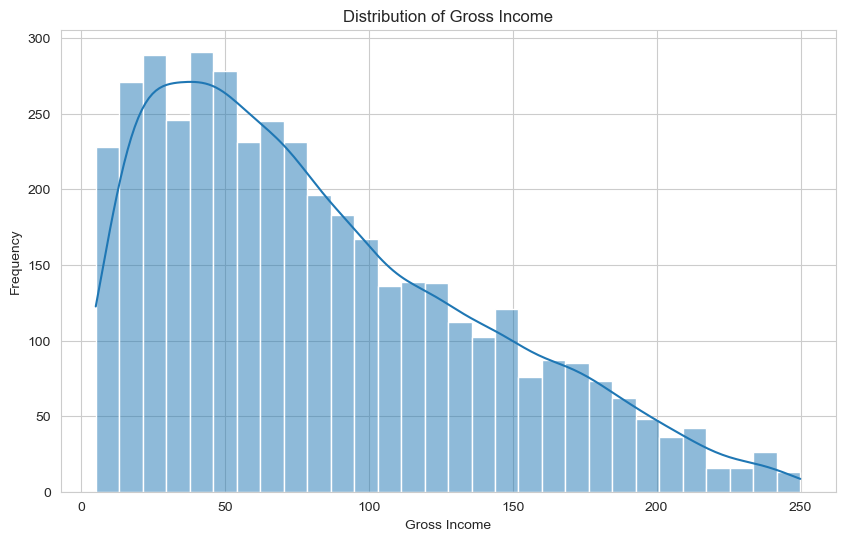

In [8]:
# Set the style for plots
sns.set_style('whitegrid')

# Plotting the distribution of a numerical column, e.g., 'gross income'
plt.figure(figsize=(10, 6))
sns.histplot(df['gross income'], bins=30, kde=True)
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.show()

### Identify outliers

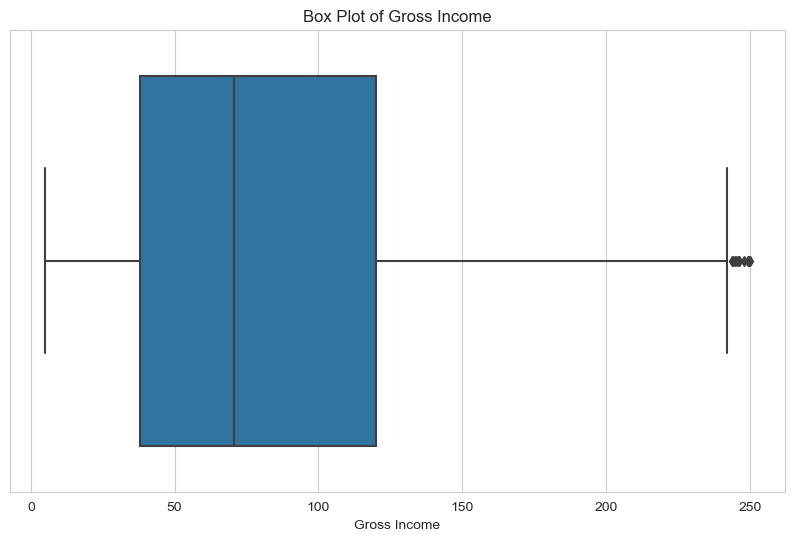

In [9]:
# Box plot to identify outliers in 'gross income' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['gross income'])
plt.title('Box Plot of Gross Income')
plt.xlabel('Gross Income')
plt.show()

### Visualize relationships between numerical variables

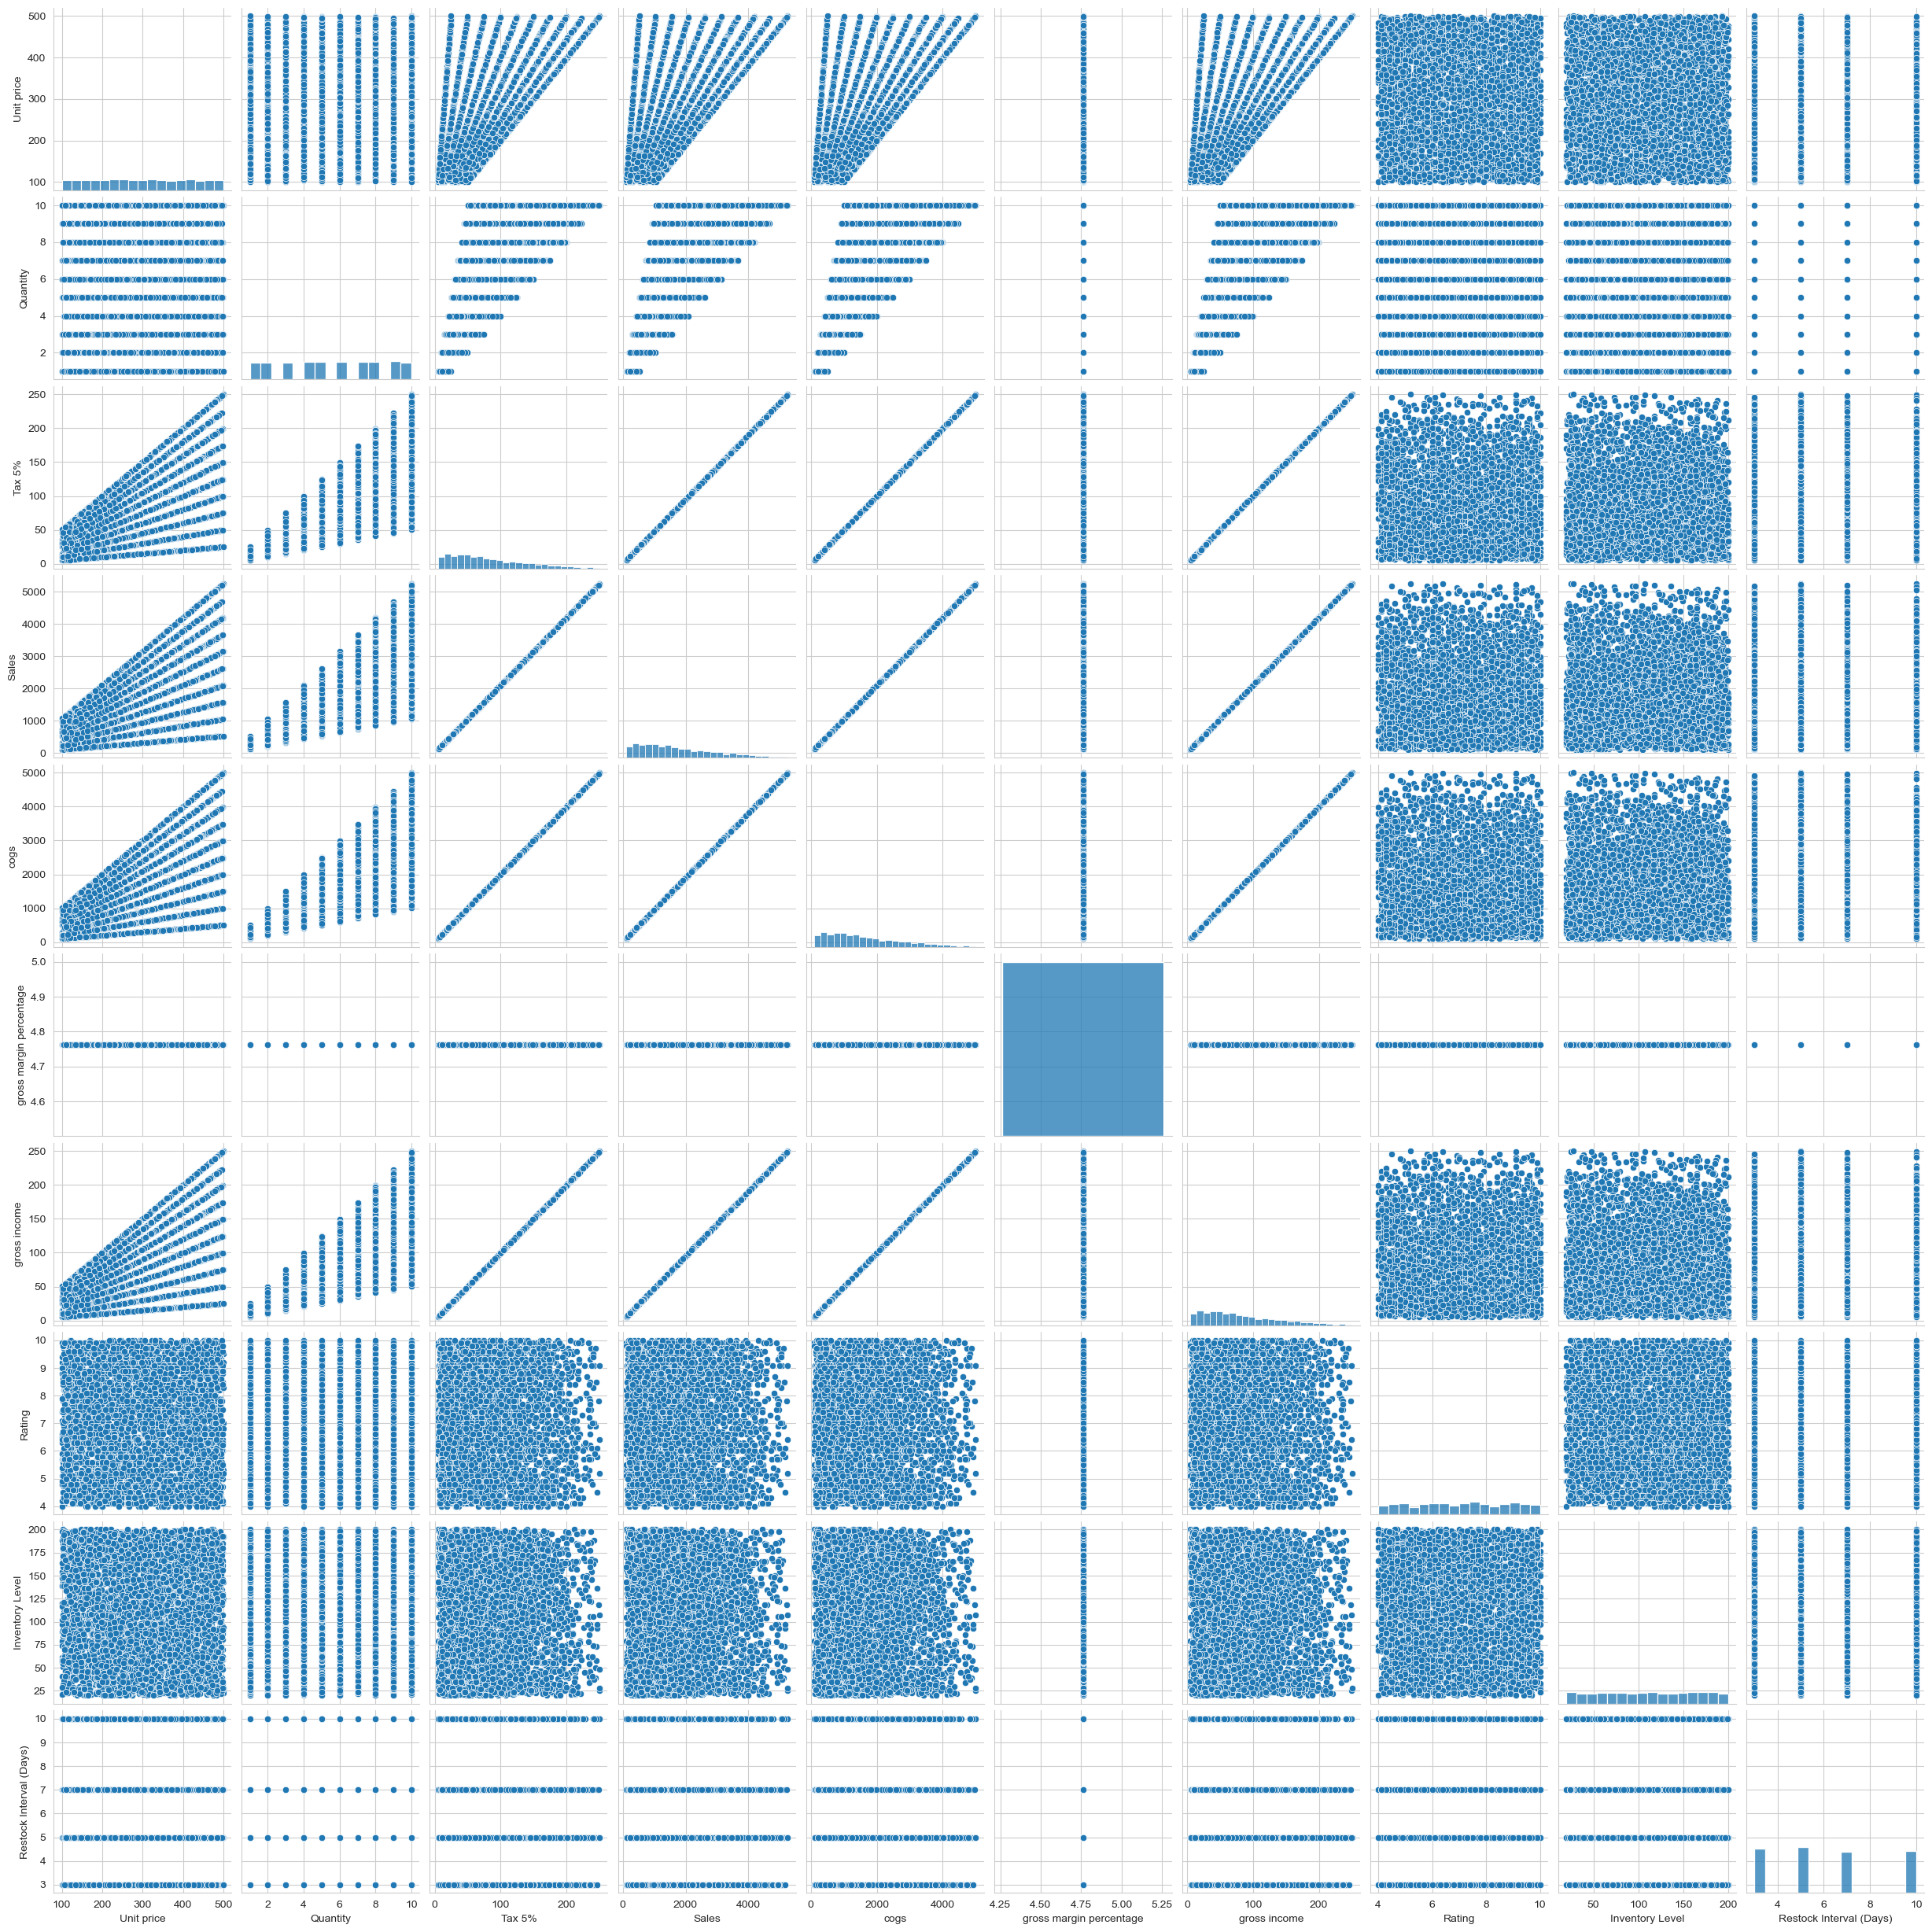

In [10]:
# Pairplot to see relationships between numerical columns
sns.pairplot(df)
plt.show()